<a href="https://colab.research.google.com/github/arunmadapathi-1609/Deep-Learning-using-the-python.ipynb/blob/main/MNSIT%20Digit%20Classification%20using%20the%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [250]:
#loading the MNIST data from keras data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [251]:
type(x_train)

numpy.ndarray

In [252]:

print(x_train.shape,y_train.shape ,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [253]:
#training data =60000 images
#test data =10000 images
# image Dimension = 28*28
#grayscale image

In [254]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

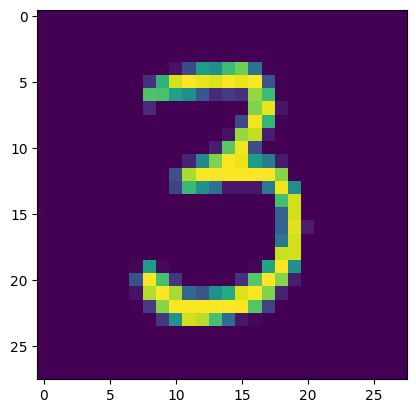

3


In [301]:

#displaying the image

plt.imshow(x_train[50])
plt.show()

print(y_train[50])

In [302]:
print(y_train.shape , y_test.shape)

(60000,) (10000,)


In [303]:
# unique values in Y train
print(np.unique(y_train))

# unique values in Y test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [304]:
#All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension
# scaling the values

x_train = x_train/255 # converting into the 1 or 0 for thr binary form
x_test =x_test/255

In [305]:

 # printing the 5 th image
 print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [306]:
# building the neural networks

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [307]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [308]:
# training the Neural Network

model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8552 - loss: 0.5015
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9566 - loss: 0.1444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9687 - loss: 0.1022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9755 - loss: 0.0800
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9796 - loss: 0.0662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9856 - loss: 0.0455
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9885 - loss: 0.0378
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0346
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0299


training data accurcay is 99.07%



In [310]:
#Accurcay on the test data
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1332
0.9703999757766724


In [311]:
print(x_test.shape)

(10000, 28, 28)


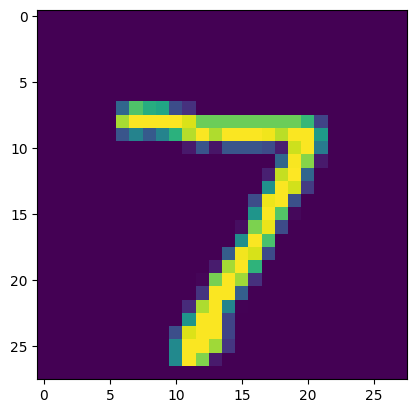

In [312]:
# first data point in X_test
plt.imshow(x_test[0])
plt.show()

In [313]:

print(y_test[0])

7


In [314]:

y_pred = model.predict(x_test) # model.predict gives the probablity of the class label

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [315]:
print(y_pred.shape)

(10000, 10)


In [316]:
print(y_pred[0])

[9.8237870e-06 3.4296807e-04 4.2386116e-03 8.8488829e-01 5.5138008e-07
 1.4315598e-04 1.8783105e-08 9.9999130e-01 2.6533438e-02 1.2087356e-01]


In [317]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [318]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [319]:
#y_test --> True labels

#y_pred_labels --> Predicted Labels

In [320]:
# confusion matrix
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [321]:

print(conf_mat)

tf.Tensor(
[[ 955    0    2    2    2    3    3    5    2    6]
 [   0 1110    7    3    2    0    6    1    5    1]
 [   4    0 1001   11    1    0    2    8    5    0]
 [   0    0    5  994    0    2    0    3    4    2]
 [   0    0    4    2  964    1    3    0    1    7]
 [   2    0    0   15    4  858    8    1    2    2]
 [   4    3    2    1    9    5  931    0    3    0]
 [   1    1   11    7    4    0    0  989    3   12]
 [   2    0    3   16    2    8    3    2  935    3]
 [   1    2    0    8   22    4    0    3    2  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

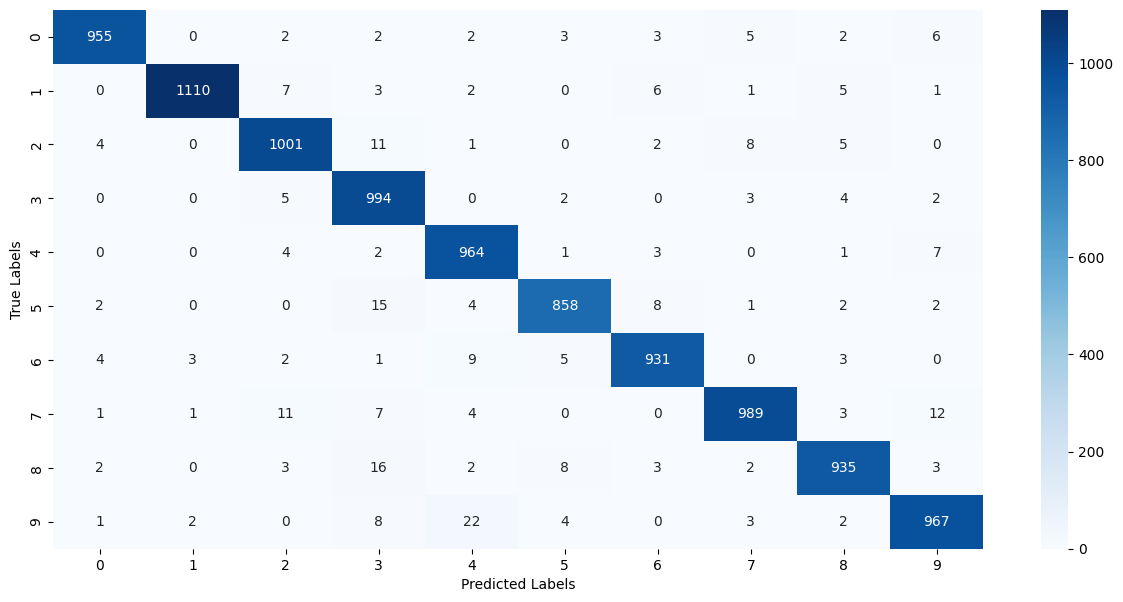

In [322]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [323]:
input_image_path ='/content/mnsit image.png'

input_image = cv2.imread(input_image_path)

In [324]:
type(input_image)

numpy.ndarray

In [325]:


print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


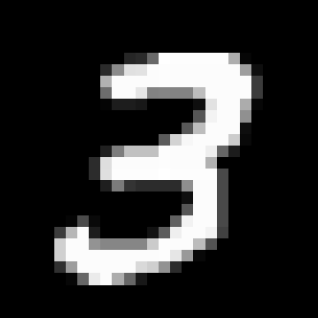

In [326]:
cv2_imshow(input_image)

In [327]:
input_image.shape

(318, 318, 3)

In [328]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) # converting into the grayscale image

In [329]:

grayscale.shape

(318, 318)

In [330]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [331]:
input_image_resize.shape

(28, 28)

In [332]:
cv2_imshow(input_image_resize)

In [333]:
input_image_resize = input_image_resize/255

In [334]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [335]:

input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[4.02383298e-15 5.80657525e-06 1.17904696e-04 1.00000000e+00
  5.90283454e-15 1.01712452e-04 9.35176382e-15 3.71444257e-05
  5.02946973e-01 1.76930632e-02]]


In [336]:
input_pred_label = np.argmax(input_prediction)

In [337]:
print(input_pred_label)

3


Path of the image to be predicted: /content/mnsit image.png


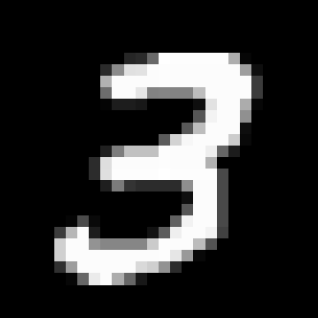

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The Handwritten Digit is recognised as  3


In [338]:
# predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Could not load image from the provided path.")
else:
    cv2_imshow(input_image)

    grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    input_image_resize = cv2.resize(grayscale, (28, 28))

    input_image_resize = input_image_resize/255

    image_reshaped = np.reshape(input_image_resize, [1,28,28])

    input_prediction = model.predict(image_reshaped)

    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognised as ', input_pred_label)